In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('happiness.csv')

attributes = ['Log GDP per capita',
              'Healthy life expectancy at birth',
              'Generosity', 'Perceptions of corruption',
              'Confidence in national government',
              'gini of household income reported in Gallup, by wp5-year',
              'Standard deviation of ladder by country-year',
              'Social support',
                  'Perceptions of corruption',
                  'Life Ladder',
                  'Democratic Quality',
                  'Freedom to make life choices']

data = data.dropna(subset=['Log GDP per capita'])

data = data.drop(data.columns.difference(attributes), axis=1)

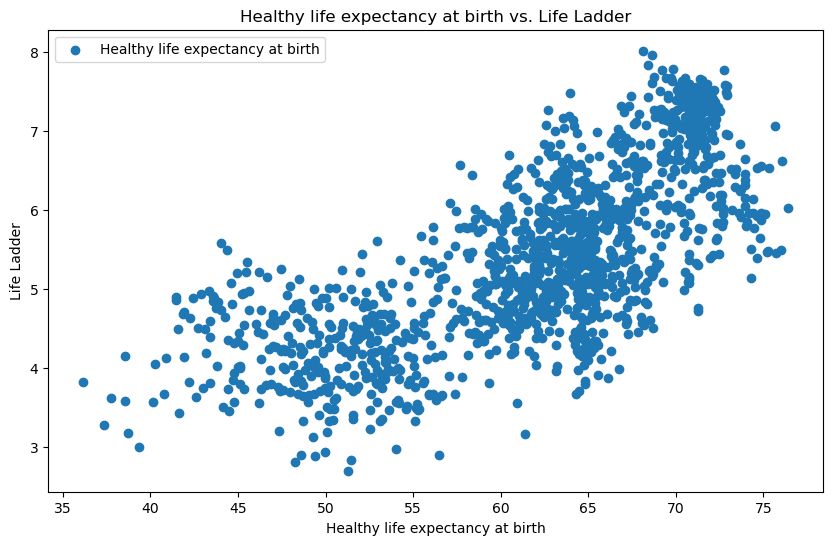

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Healthy life expectancy at birth'], data['Life Ladder'], label = 'Healthy life expectancy at birth')

plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Life Ladder')
plt.title('Healthy life expectancy at birth vs. Life Ladder')
plt.legend()
plt.show()

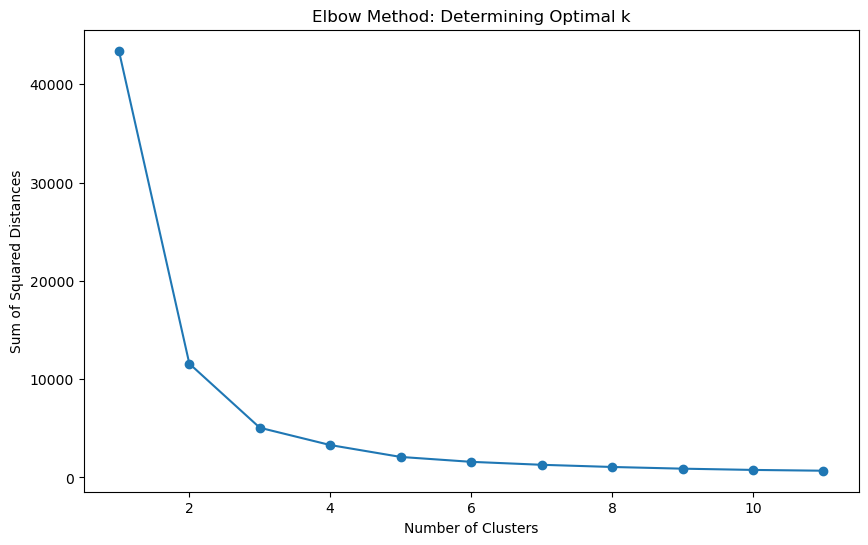

In [3]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

data.dropna(subset=attributes, inplace=True)

ex_vs_hap = ['Healthy life expectancy at birth', 'Life Ladder']

X = data[ex_vs_hap]

sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method: Determining Optimal k')
plt.show()

62.215383061937466


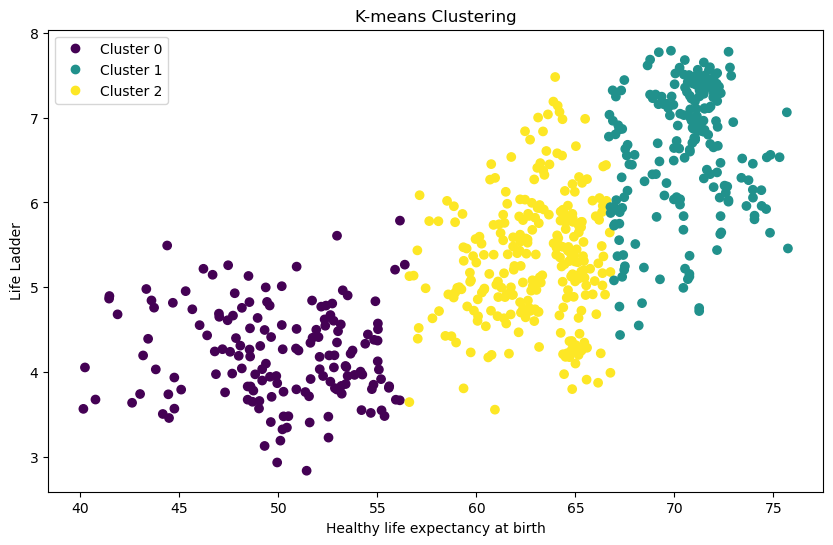

In [4]:
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

prev_centroids = None

while True:
    centroids = kmeans.cluster_centers_
    
    labels = kmeans.predict(X)
    
    if np.array_equal(centroids, prev_centroids):
        break
    
    prev_centroids = centroids.copy()
    
    for i in range(len(X)):
        point = X.iloc[i]
        closest_centroid = kmeans.predict([point])[0]
        if closest_centroid != labels[i]:
            labels[i] = closest_centroid

    kmeans.cluster_centers_ = centroids
    
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Healthy life expectancy at birth'], X['Life Ladder'], c=labels, cmap='viridis')
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Life Ladder')
plt.title('K-means Clustering')

unique_labels = np.unique(labels)

legend_handles = [scatter.legend_elements()[0][i] for i in unique_labels]
legend_labels = ['Cluster ' + str(label) for label in unique_labels]

plt.legend(legend_handles, legend_labels)

average_lifeex = data['Healthy life expectancy at birth'].mean()
print(average_lifeex)

plt.show()

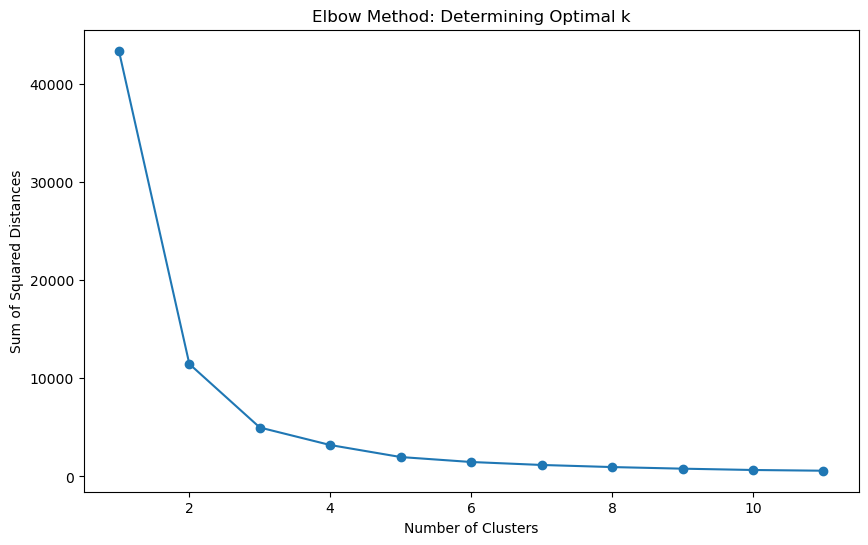

In [5]:
ex_vs_gdp = ['Healthy life expectancy at birth', 'Log GDP per capita']

X = data[ex_vs_gdp]

sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method: Determining Optimal k')

plt.show()

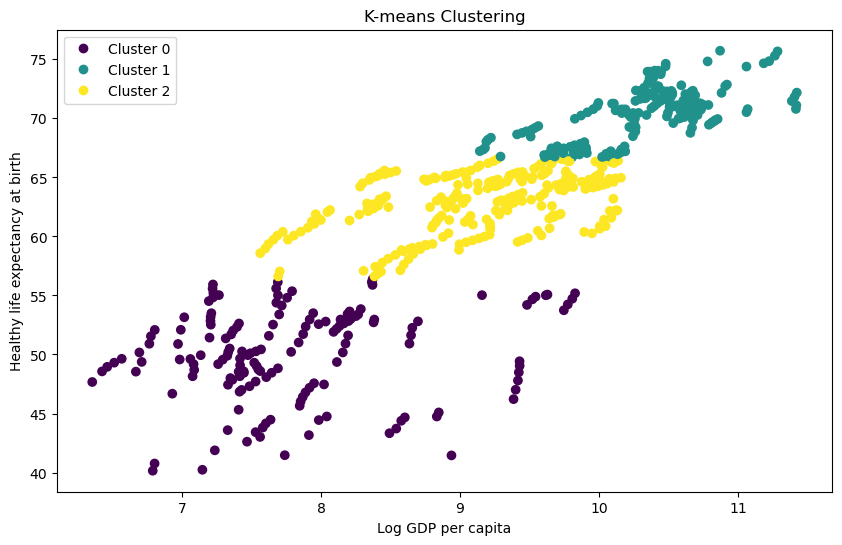

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

prev_centroids = None

while True:
    centroids = kmeans.cluster_centers_
    
    labels = kmeans.predict(X)
    
    if np.array_equal(centroids, prev_centroids):
        break
    
    prev_centroids = centroids.copy()
    
    for i in range(len(X)):
        point = X.iloc[i]
        closest_centroid = kmeans.predict([point])[0]
        if closest_centroid != labels[i]:
            labels[i] = closest_centroid

    kmeans.cluster_centers_ = centroids

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Log GDP per capita'], X['Healthy life expectancy at birth'], c=labels, cmap='viridis')
plt.ylabel('Healthy life expectancy at birth')
plt.xlabel('Log GDP per capita')
plt.title('K-means Clustering')

unique_labels = np.unique(labels)

legend_handles = [scatter.legend_elements()[0][i] for i in unique_labels]
legend_labels = ['Cluster ' + str(label) for label in unique_labels]

plt.legend(legend_handles, legend_labels)


plt.show()

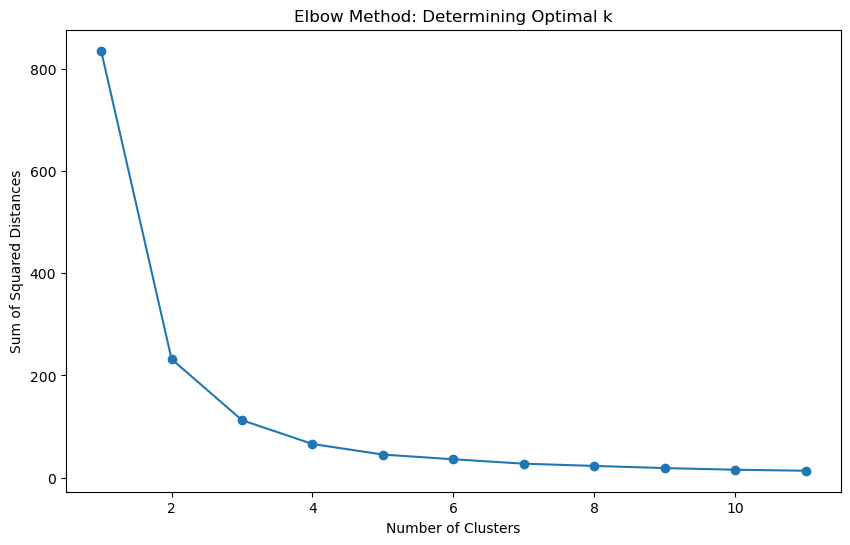

In [7]:
ss_vs_log = ['Log GDP per capita', 'Social support']

X = data[ss_vs_log]

sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method: Determining Optimal k')

plt.show()

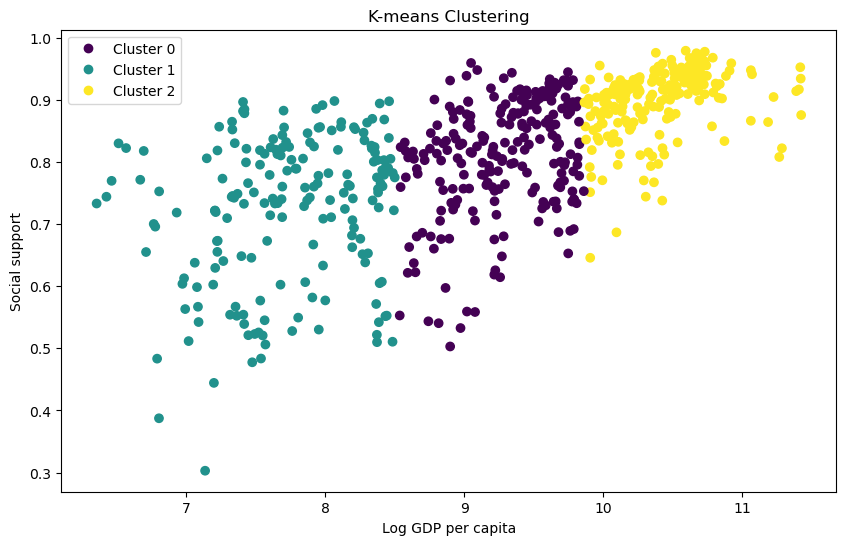

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

prev_centroids = None

while True:
    centroids = kmeans.cluster_centers_
    
    labels = kmeans.predict(X)
    
    if np.array_equal(centroids, prev_centroids):
        break
    
    prev_centroids = centroids.copy()
    
    for i in range(len(X)):
        point = X.iloc[i]
        closest_centroid = kmeans.predict([point])[0]
        if closest_centroid != labels[i]:
            labels[i] = closest_centroid

    kmeans.cluster_centers_ = centroids

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Log GDP per capita'], X['Social support'], c=labels, cmap='viridis')
plt.ylabel('Social support')
plt.xlabel('Log GDP per capita')
plt.title('K-means Clustering')

unique_labels = np.unique(labels)

legend_handles = [scatter.legend_elements()[0][i] for i in unique_labels]
legend_labels = ['Cluster ' + str(label) for label in unique_labels]

plt.legend(legend_handles, legend_labels)

plt.show()

[30.831386683730038, 50.69731064944973, 25.60449817589499]


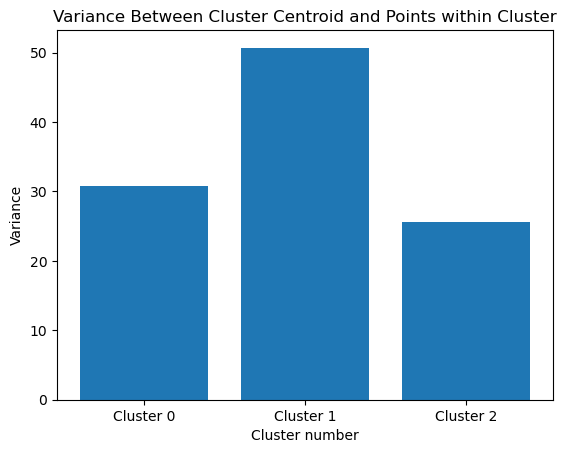

In [9]:
cluster_variances = []
for i in range(kmeans.n_clusters):
    cluster_points = X[labels == i]
    cluster_center = kmeans.cluster_centers_[i]
    variance = np.sum(np.square(cluster_points - cluster_center))
    cluster_variances.append(variance)

variances = [item[0] for item in cluster_variances]   
print(variances)
plt.bar(['Cluster 0','Cluster 1','Cluster 2'], variances)
plt.xlabel('Cluster number')
plt.ylabel('Variance') 
plt.title('Variance Between Cluster Centroid and Points within Cluster')

plt.show()

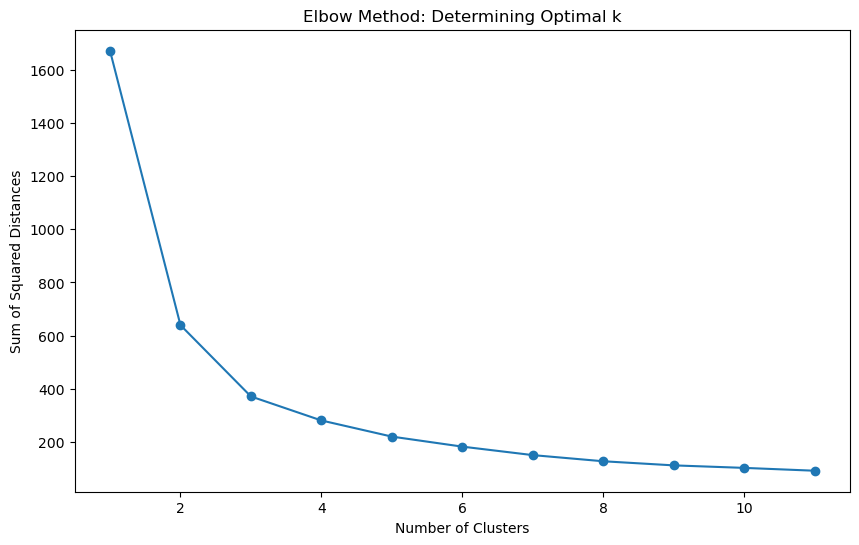

In [10]:
hap_vs_log = ['Log GDP per capita', 'Life Ladder']

X = data[hap_vs_log]

sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method: Determining Optimal k')

plt.show()

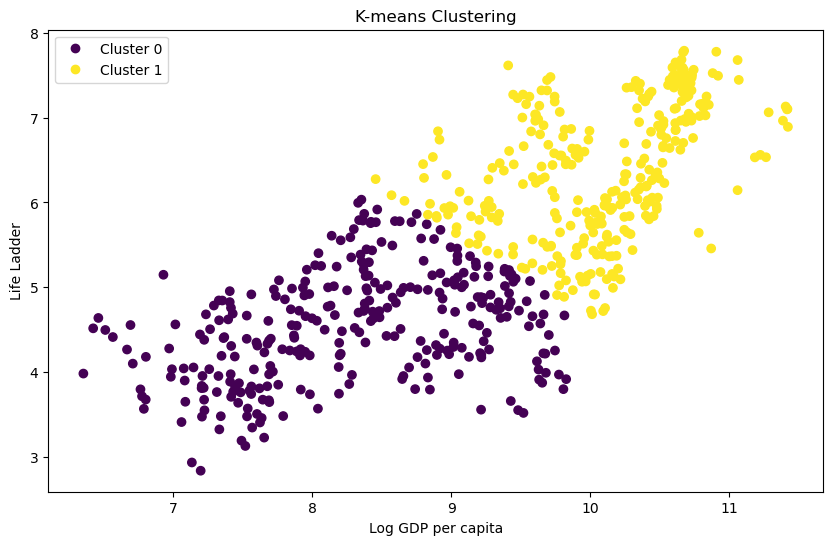

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

prev_centroids = None

while True:
    centroids = kmeans.cluster_centers_
    
    labels = kmeans.predict(X)
    
    if np.array_equal(centroids, prev_centroids):
        break
    
    prev_centroids = centroids.copy()
    
    for i in range(len(X)):
        point = X.iloc[i]
        closest_centroid = kmeans.predict([point])[0]
        if closest_centroid != labels[i]:
            labels[i] = closest_centroid

    kmeans.cluster_centers_ = centroids

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Log GDP per capita'], X['Life Ladder'], c=labels, cmap='viridis')
plt.ylabel('Life Ladder')
plt.xlabel('Log GDP per capita')
plt.title('K-means Clustering')

unique_labels = np.unique(labels)

legend_handles = [scatter.legend_elements()[0][i] for i in unique_labels]
legend_labels = ['Cluster ' + str(label) for label in unique_labels]

plt.legend(legend_handles, legend_labels)

plt.show()

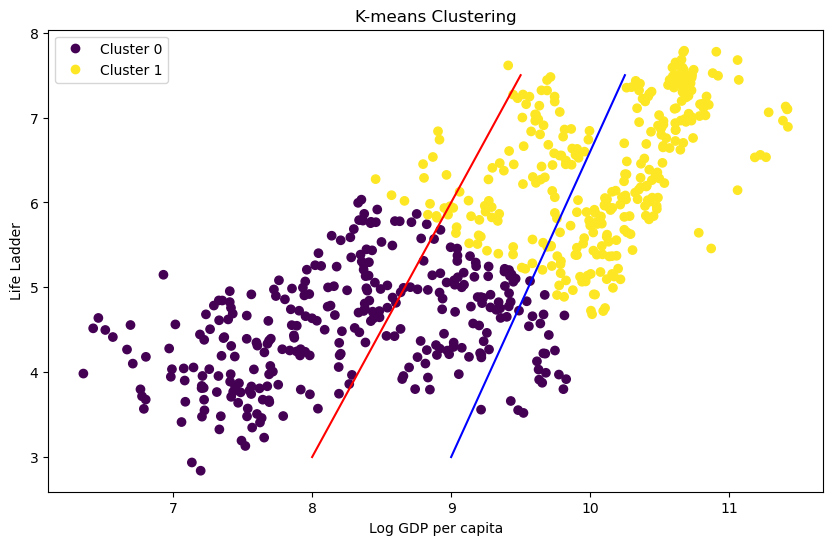

In [12]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Log GDP per capita'], X['Life Ladder'], c=labels, cmap='viridis')
plt.ylabel('Life Ladder')
plt.xlabel('Log GDP per capita')
plt.title('K-means Clustering')

unique_labels = np.unique(labels)

legend_handles = [scatter.legend_elements()[0][i] for i in unique_labels]
legend_labels = ['Cluster ' + str(label) for label in unique_labels]

plt.legend(legend_handles, legend_labels)

plt.plot([8, 9.5], [3, 7.5], color='r', linestyle='-', label='Diagonal Line')
plt.plot([9, 10.25], [3, 7.5], color='b', linestyle='-', label='Diagonal Line')

# Display the plot
plt.show()

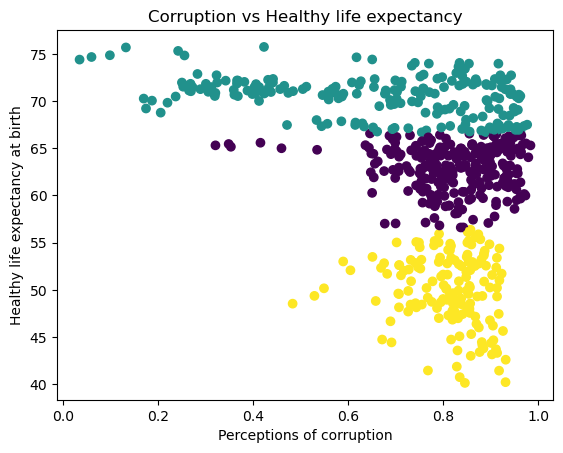

In [13]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
# Split the data into training and test sets.
from sklearn.cluster import KMeans

data = data.dropna(subset=['Perceptions of corruption','Healthy life expectancy at birth'])
data = data.reset_index(drop=True)
pd.set_option('display.max_rows', None)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(data[['Perceptions of corruption','Healthy life expectancy at birth']])
data['kmeans'] = kmeans.labels_
plt.scatter(x=data['Perceptions of corruption'], y =data['Healthy life expectancy at birth'],c=data['kmeans'])
plt.xlabel('Perceptions of corruption')
plt.ylabel('Healthy life expectancy at birth')
plt.title('Corruption vs Healthy life expectancy')
plt.show()

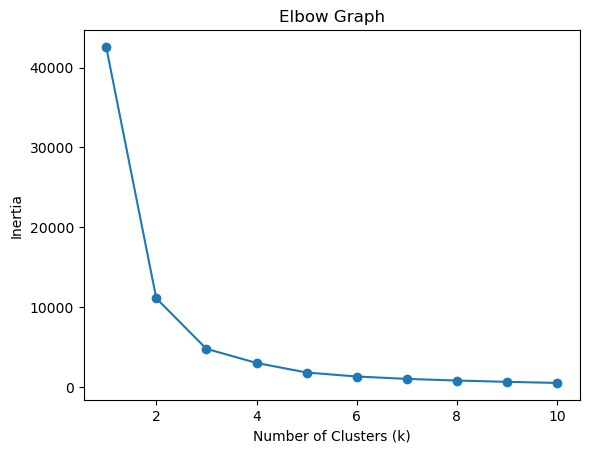

In [14]:
inertia_values = []

# Set the range of cluster numbers to try
k_values = range(1, 11)  # Try cluster numbers from 1 to 10

# Iterate over each cluster number and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Perceptions of corruption','Healthy life expectancy at birth']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()

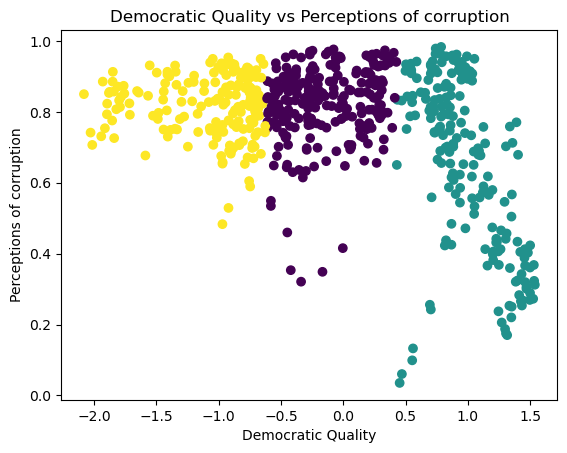

In [15]:


data = data.reset_index(drop=True)
pd.set_option('display.max_rows', None)

kmeans = KMeans(n_clusters =3)
kmeans.fit(data[['Democratic Quality','Perceptions of corruption']])
data['kmeans'] = kmeans.labels_
plt.scatter(x=data['Democratic Quality'], y =data['Perceptions of corruption'],c=data['kmeans'])
plt.xlabel('Democratic Quality')
plt.ylabel('Perceptions of corruption')
plt.title('Democratic Quality vs Perceptions of corruption')
plt.show()

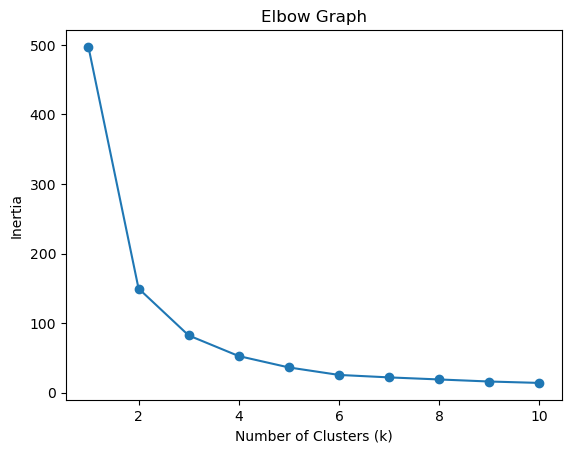

In [16]:
inertia_values = []

# Set the range of cluster numbers to try
k_values = range(1, 11)  # Try cluster numbers from 1 to 10

# Iterate over each cluster number and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Democratic Quality','Perceptions of corruption']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()

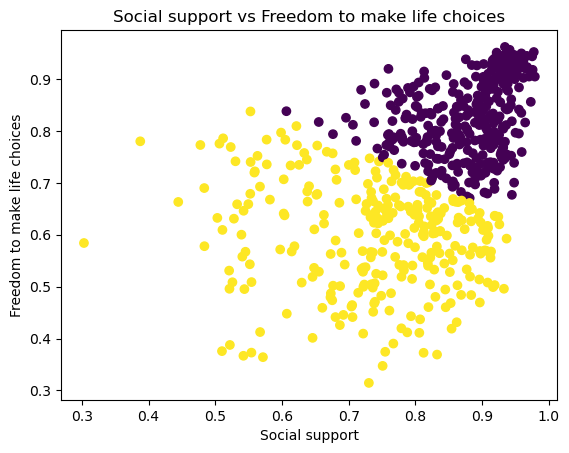

In [17]:


data = data.reset_index(drop=True)
pd.set_option('display.max_rows', None)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(data[['Social support','Freedom to make life choices']])
data['kmeans'] = kmeans.labels_
plt.scatter(x=data['Social support'], y =data['Freedom to make life choices'],c=data['kmeans'])
plt.xlabel('Social support')
plt.ylabel('Freedom to make life choices')
plt.title('Social support vs Freedom to make life choices')
plt.show()

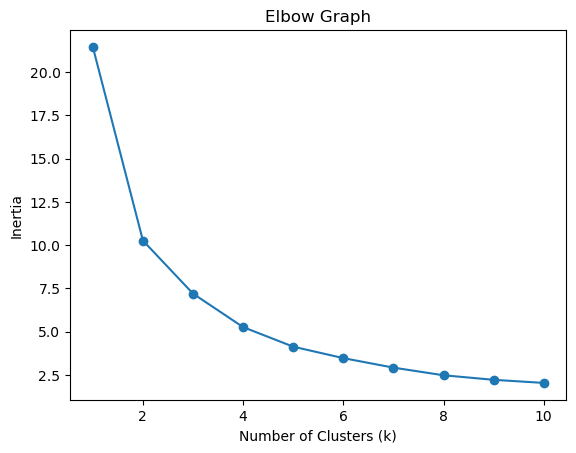

In [18]:
inertia_values = []

# Set the range of cluster numbers to try
k_values = range(1, 11)  # Try cluster numbers from 1 to 10

# Iterate over each cluster number and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Social support','Freedom to make life choices']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()

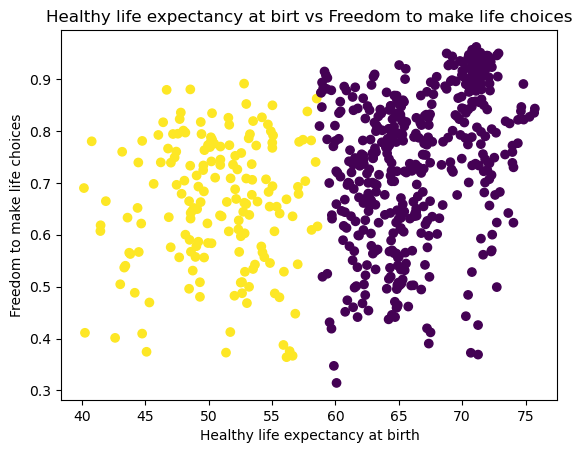

In [19]:

data = data.dropna(subset=['Healthy life expectancy at birth','Freedom to make life choices'])
data = data.reset_index(drop=True)
pd.set_option('display.max_rows', None)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(data[['Healthy life expectancy at birth','Freedom to make life choices']])
data['kmeans'] = kmeans.labels_
plt.scatter(x=data['Healthy life expectancy at birth'], y =data['Freedom to make life choices'],c=data['kmeans'])
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Freedom to make life choices')
plt.title('Healthy life expectancy at birt vs Freedom to make life choices')
plt.show()

In [20]:
column_to_remove = 'kmeans'
data = data.drop(column_to_remove, axis=1)
data.to_csv('clean.csv')